#### Step 1:  Load in the MNIST Dataset

In [2]:
import pickle

with open('../data/MNIST/processed/X_train.pkl', 'rb') as X:
    X_train = pickle.load(X)

In [3]:
with open('../data/MNIST/processed/y_train.pkl', 'rb') as y:
    y_train = pickle.load(y)

#### Step 2:  Check the shape of your training images, and look at the first item.  

Can you make sense of how your data is shaped?

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Step 3).  Try using the imshow() method in matplotlib to see what the first image looks like

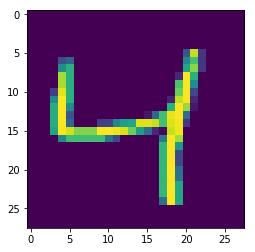

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2]);

#### Step 4).  To make this a little bit easier, let's just use the first 100 images of the dataset, so computation doesn't take too long.

In [10]:
X100 = X_train[:100]
y100 = y_train[:100]

#### Standardize by dividing the training set by 255

In [11]:
X100 = X100 / 255

#### Step 5).  Reshape your data so that it's two dimensional:  100X784

In [12]:
X100 = X100.reshape(100, 784)

#### Step 6). Initialize a hidden unit with 10 neurons, as well as a separate set of variables that represent the intercept term for each neuron in your hidden layer.

In [8]:
import numpy as np

hidden_weights    = np.random.normal(0, 0.1, size=(784, 10))
hidden_intercepts = np.random.normal(0, 0.1, size=10)

#### Step 7).  Use the dot() method to matrix multiply your input with your layer of hidden weights to create your hidden layer.  Apply the Relu activation function afterwards.

In [13]:
X_hidden = X100.dot(hidden_weights) + hidden_intercepts
X_hidden = np.maximum(0, X_hidden)

In [14]:
X_hidden.shape

(100, 10)

#### Step 8:  Initialize another hidden layer with 5 neurons, with the appropriate number of intercept terms.

In [15]:
hidden_weights2   = np.random.normal(0, 0.1, size=(10, 5))
hidden_intercepts = np.random.normal(0, 0.1, 5)

#### Step 9:  Matrix multiply the output from your last layer, and activate it with ReLu.

In [16]:
X_hidden2 = X_hidden.dot(hidden_weights2) + hidden_intercepts
X_hidden2 = np.maximum(0, X_hidden2)

In [17]:
X_hidden2.shape

(100, 5)

#### Step 10:  Create Your Output Layer To Accommodate Each Unique Value in y.  No intercept terms.

In [18]:
output_weights = np.random.normal(0, 0.1, size=(5, 10))

#### Step 11:  Matrix multiply your last hidden layer with your output layer, and apply the sigmoid function

In [19]:
from scipy.special import expit

output = X_hidden2.dot(output_weights)
output = expit(output)

In [20]:
output[0]

array([0.49887169, 0.49994473, 0.49803851, 0.49963494, 0.50127361,
       0.5004473 , 0.49708469, 0.49967124, 0.49931186, 0.50265391])

#### Step 12:  Create your prediction by choosing the column in your output layer with the highest overall value.

In [40]:
preds = np.argmax(output, axis=1)

#### What Was The Accuracy After Your First Round of Computation?

In [48]:
np.mean(y_train[:100] == preds)

0.1

#### Bonus:  Create Your Own Functions Called `forward` and `predict` that codify what you did in this lab, where you can specify how many neurons to use for each hidden layer, and make a corresponding prediction.

In [61]:
def forward(X, y, layer1=10, layer2=5):
    # defining number of input and output columns will be useful for later
    input_cols  = X.shape[1]
    output_cols = len(np.unique(y))
    
    # initialize weights
    # weights to create your output
    h1w = np.random.normal(0, 0.1, size=(input_cols, layer1))
    # intercept terms to add in
    h1b = np.random.normal(0, 0.1, size=layer1)
    
    # weights and intercept terms to create your second layer of data
    h2w = np.random.normal(0, 0.1, size=(layer1, layer2))
    h2b = np.random.normal(0, 0.1, size=layer2)
    
    # final layer of weights
    outw = np.random.normal(0, 0.1, size=(layer2, output_cols))
    
    # this is your first 'inner layer' of your daya
    h1_output = X.dot(h1w) + h1b
    h1_output = np.maximum(0, h1_output)
    
    # your second hidden layer is created by taken the first inner layer
    # and multiplying that by this layer's weights and applying an 
    # activation function
    h2_output = h1_output.dot(h2w) + h2b
    h2_output = np.maximum(0, h2_output)
    
    # this is your final output from the forward pass
    final_output = h2_output.dot(outw)
    final_output = expit(final_output)
    
    return final_output

In [64]:
def predict(X):
    preds  = np.argmax(X, axis=1)
    return preds

In [65]:
output = forward(X100, y_train[:100])
preds  = predict(output)